In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm import tqdm
sns.set_palette('Dark2')
sns.set_style({'axes.axisbelow': True, 'axes.edgecolor': '.15', 'axes.facecolor': 'white',
               'axes.grid': True, 'axes.labelcolor': '.15', 'axes.linewidth': 1.25, 
               'figure.facecolor': 'white', 'font.family': ['sans-serif'], 'grid.color': '.15',
               'grid.linestyle': ':', 'grid.alpha': .5, 'image.cmap': 'Greys', 
               'legend.frameon': False, 'legend.numpoints': 1, 'legend.scatterpoints': 1,
               'lines.solid_capstyle': 'round', 'axes.spines.right': False, 'axes.spines.top': False,  
               'text.color': '.15',  'xtick.top': False, 'ytick.right': False, 'xtick.color': '.15',
               'xtick.direction': 'out', 'xtick.major.size': 6, 'xtick.minor.size': 3,
               'ytick.color': '.15', 'ytick.direction': 'out', 'ytick.major.size': 6,'ytick.minor.size': 3})
sns.set_context('paper')

#http://phyletica.org/matplotlib-fonts/
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
from snapanalysis.config import OUTPUT_DIRECTORY as MAIN_OUTPUT_DIRECTORY
OUTPUT_DIRECTORY = os.path.join(MAIN_OUTPUT_DIRECTORY, 'ptm-response')

if not os.path.isdir(OUTPUT_DIRECTORY):
    os.makedirs(OUTPUT_DIRECTORY)
    
def output_path(basename):
    return os.path.join(OUTPUT_DIRECTORY, basename)

In [3]:
import importlib
import helpers
importlib.reload(helpers)
from helpers import *

In [4]:
from snapanalysis.models.ptm_response.main import FDR_THRESHOLD_RESPONSE, FC_THRESHOLD_RESPONSE
from snapanalysis.models.ptm_response.main import PREDICTOR_ORDER

First save the network

In [5]:
from snapanalysis.models.ptm_response.predictor_graph import _informative_nucleosome_graph
import networkx as nx
from snapanalysis.models.network.utilities import write_gexf_compatible_with_cytoscape

In [6]:
network, network_df = _informative_nucleosome_graph()
write_gexf_compatible_with_cytoscape(network, output_path('ptm-info-network.gexf'))

2020-12-03 19:33:44,604 - snapanalysis.informative_nucleosome_graph - INFO - PTM predictive network generated: 53 nodes, 82 edges
2020-12-03 19:33:44,607 - snapanalysis.informative_nucleosome_graph - INFO - Found 3 non informative di-nucleosomes: ['H17', 'H33', 'H34']
2020-12-03 19:33:44,616 - snapanalysis.informative_nucleosome_graph - INFO - Found 1 not covered predictors: ['H3K23ac']
2020-12-03 19:33:44,622 - snapanalysis.informative_nucleosome_graph - INFO - The numbers of nucleosomes for each predictor are:
     DNA Methylation: 9 nucleosomes
            H4K20me2: 8 nucleosomes
             H4K16ac: 8 nucleosomes
         H3K9acK14ac: 8 nucleosomes
            H3K27me3: 6 nucleosomes
                H3ac: 6 nucleosomes
                H4ac: 5 nucleosomes
             H3K4me1: 5 nucleosomes
             H3K4me3: 5 nucleosomes
            H4K20me3: 4 nucleosomes
             H3K9me3: 4 nucleosomes
               H2A.Z: 3 nucleosomes
            H3K27me2: 2 nucleosomes
             H

Can we draw the heatmap now?

In [7]:
counts = network_df.groupby(['predictor']).size()
counts.name = 'count'

In [8]:
import string
color_me1 = '#BBE1BB'
color_me2 = '#9FBA7D'
color_me3 = '#6F9979'
color_ac = '#6484A2'

color_palette = {
     'H2A.Z': '#786D9B',
     'H3K4me1': color_me1,
     'H3K4me3': color_me3,
     'H3K9acK14ac': color_ac,
     'H3K9me2': color_me2,
     'H3K9me3': color_me3,
     'H3K27ac': color_ac,
     'H3K27me2': color_me2,
     'H3K27me3': color_me3,
     'H3ac': color_ac,
     'H4K16ac': color_ac,
     'H4K20me2': color_me2,
     'H4K20me3': color_me3,
     'H4K5ac/H4K12ac': color_ac,
     'H3K9ac': color_ac,
     'H4K8ac': color_ac,
     'H3K14ac': color_ac,
     'H3K18ac': color_ac,
     'H4ac': color_ac,
     'DNA Methylation': '#85B3B2',
}


predictors_df = pd.DataFrame(counts).join(pd.Series(color_palette, name='color'))
predictors_df = predictors_df.sort_index()


def letter_encode(subdf):
    if len(subdf) == 1:
        return pd.Series('', index=subdf.index)
    else:
        return pd.Series(list(string.ascii_uppercase[:len(subdf)]))
        
predictors_df['label'] = predictors_df.index
predictors_df['letter_encoding'] = predictors_df.sort_values(by=['count', 'label'], ascending=[False, True]).groupby('color')['color'].transform(letter_encode)


letter_symbols = dict(zip(['',  'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
                          ['o', 'o', 's', '*', 'D', '^', 'v', '<', '>', 'X', 'x']))

predictors_df['symbol_encoding'] = predictors_df['letter_encoding'].apply(letter_symbols.get)


In [9]:
predictors_df.sort_values(by=['color', 'letter_encoding'])

,count,color,label,letter_encoding,symbol_encoding
predictor,,,,,
H3K9acK14ac,8,#6484A2,H3K9acK14ac,A,o
H4K16ac,8,#6484A2,H4K16ac,B,s
H3ac,6,#6484A2,H3ac,C,*
H4ac,5,#6484A2,H4ac,D,D
H3K27ac,2,#6484A2,H3K27ac,E,^
H3K14ac,1,#6484A2,H3K14ac,F,v
H3K18ac,1,#6484A2,H3K18ac,G,<
H3K9ac,1,#6484A2,H3K9ac,H,>
H4K5ac/H4K12ac,1,#6484A2,H4K5ac/H4K12ac,I,X


In [10]:
len(network_df.query('from_pd == "(self)"'))

15

In [11]:
len(network_df.query('from_pd != "(self)"'))

67

In [12]:
from snapanalysis.visualisation.heatmaps.pattern_heatmap import PULLDOWN_ORDER
pd_order = ['(self)'] + PULLDOWN_ORDER

from snapanalysis.preprocessing.pulldown_metadata import OUTPUT_FILE as META_FILE
colored_predictors = pd.read_hdf(META_FILE, 'meta/coloured_predictors')

color_bcg = '#F8FCF1'
colored_predictors = colored_predictors.reindex(pd_order).fillna(color_bcg)

# Shorten DNA methylation label a bit
colored_predictors = colored_predictors.rename(columns={'DNA Methylation': 'meDNA'})

In [13]:
network_subdf = network_df.copy()

In [14]:
ptm_order = list(reversed(colored_predictors.columns))
n_ptms = len(ptm_order)

pds_to_coordinates = {
    pd: pd_order.index(pd) for pd in pd_order
}

ptms_to_coordinates = dict(zip(ptm_order, range(n_ptms)))

In [15]:
ptms_to_coordinates['H2A.Z']

12

In [16]:
network_subdf.head()

,from_pd,to_pd,predictor,edge
0,(self),H01,H3K9me3,H01-(self)
1,(self),H02,H3K4me3,H02-(self)
2,(self),H03,H3K27me3,H03-(self)
3,(self),H05,H3K4me1,H05-(self)
4,(self),H07,H4K20me3,H07-(self)


In [17]:
predictor_df_legend_order = [
    'H2A.Z', 'DNA Methylation',
    '',
    'H3K4me1',
    '',
    'H4K20me2', 'H3K27me2', 'H3K9me2', 
    '',
    'H3K27me3', 'H3K4me3',
    'H3K9me3', 'H4K20me3', 
    '',
    'H3K9acK14ac',  'H3ac', 
    'H3K27ac', 'H3K14ac',
    'H3K18ac', 'H3K9ac', 
    '',
    'H4ac', 'H4K16ac',
    'H4K5ac/H4K12ac', 'H4K8ac', 
]


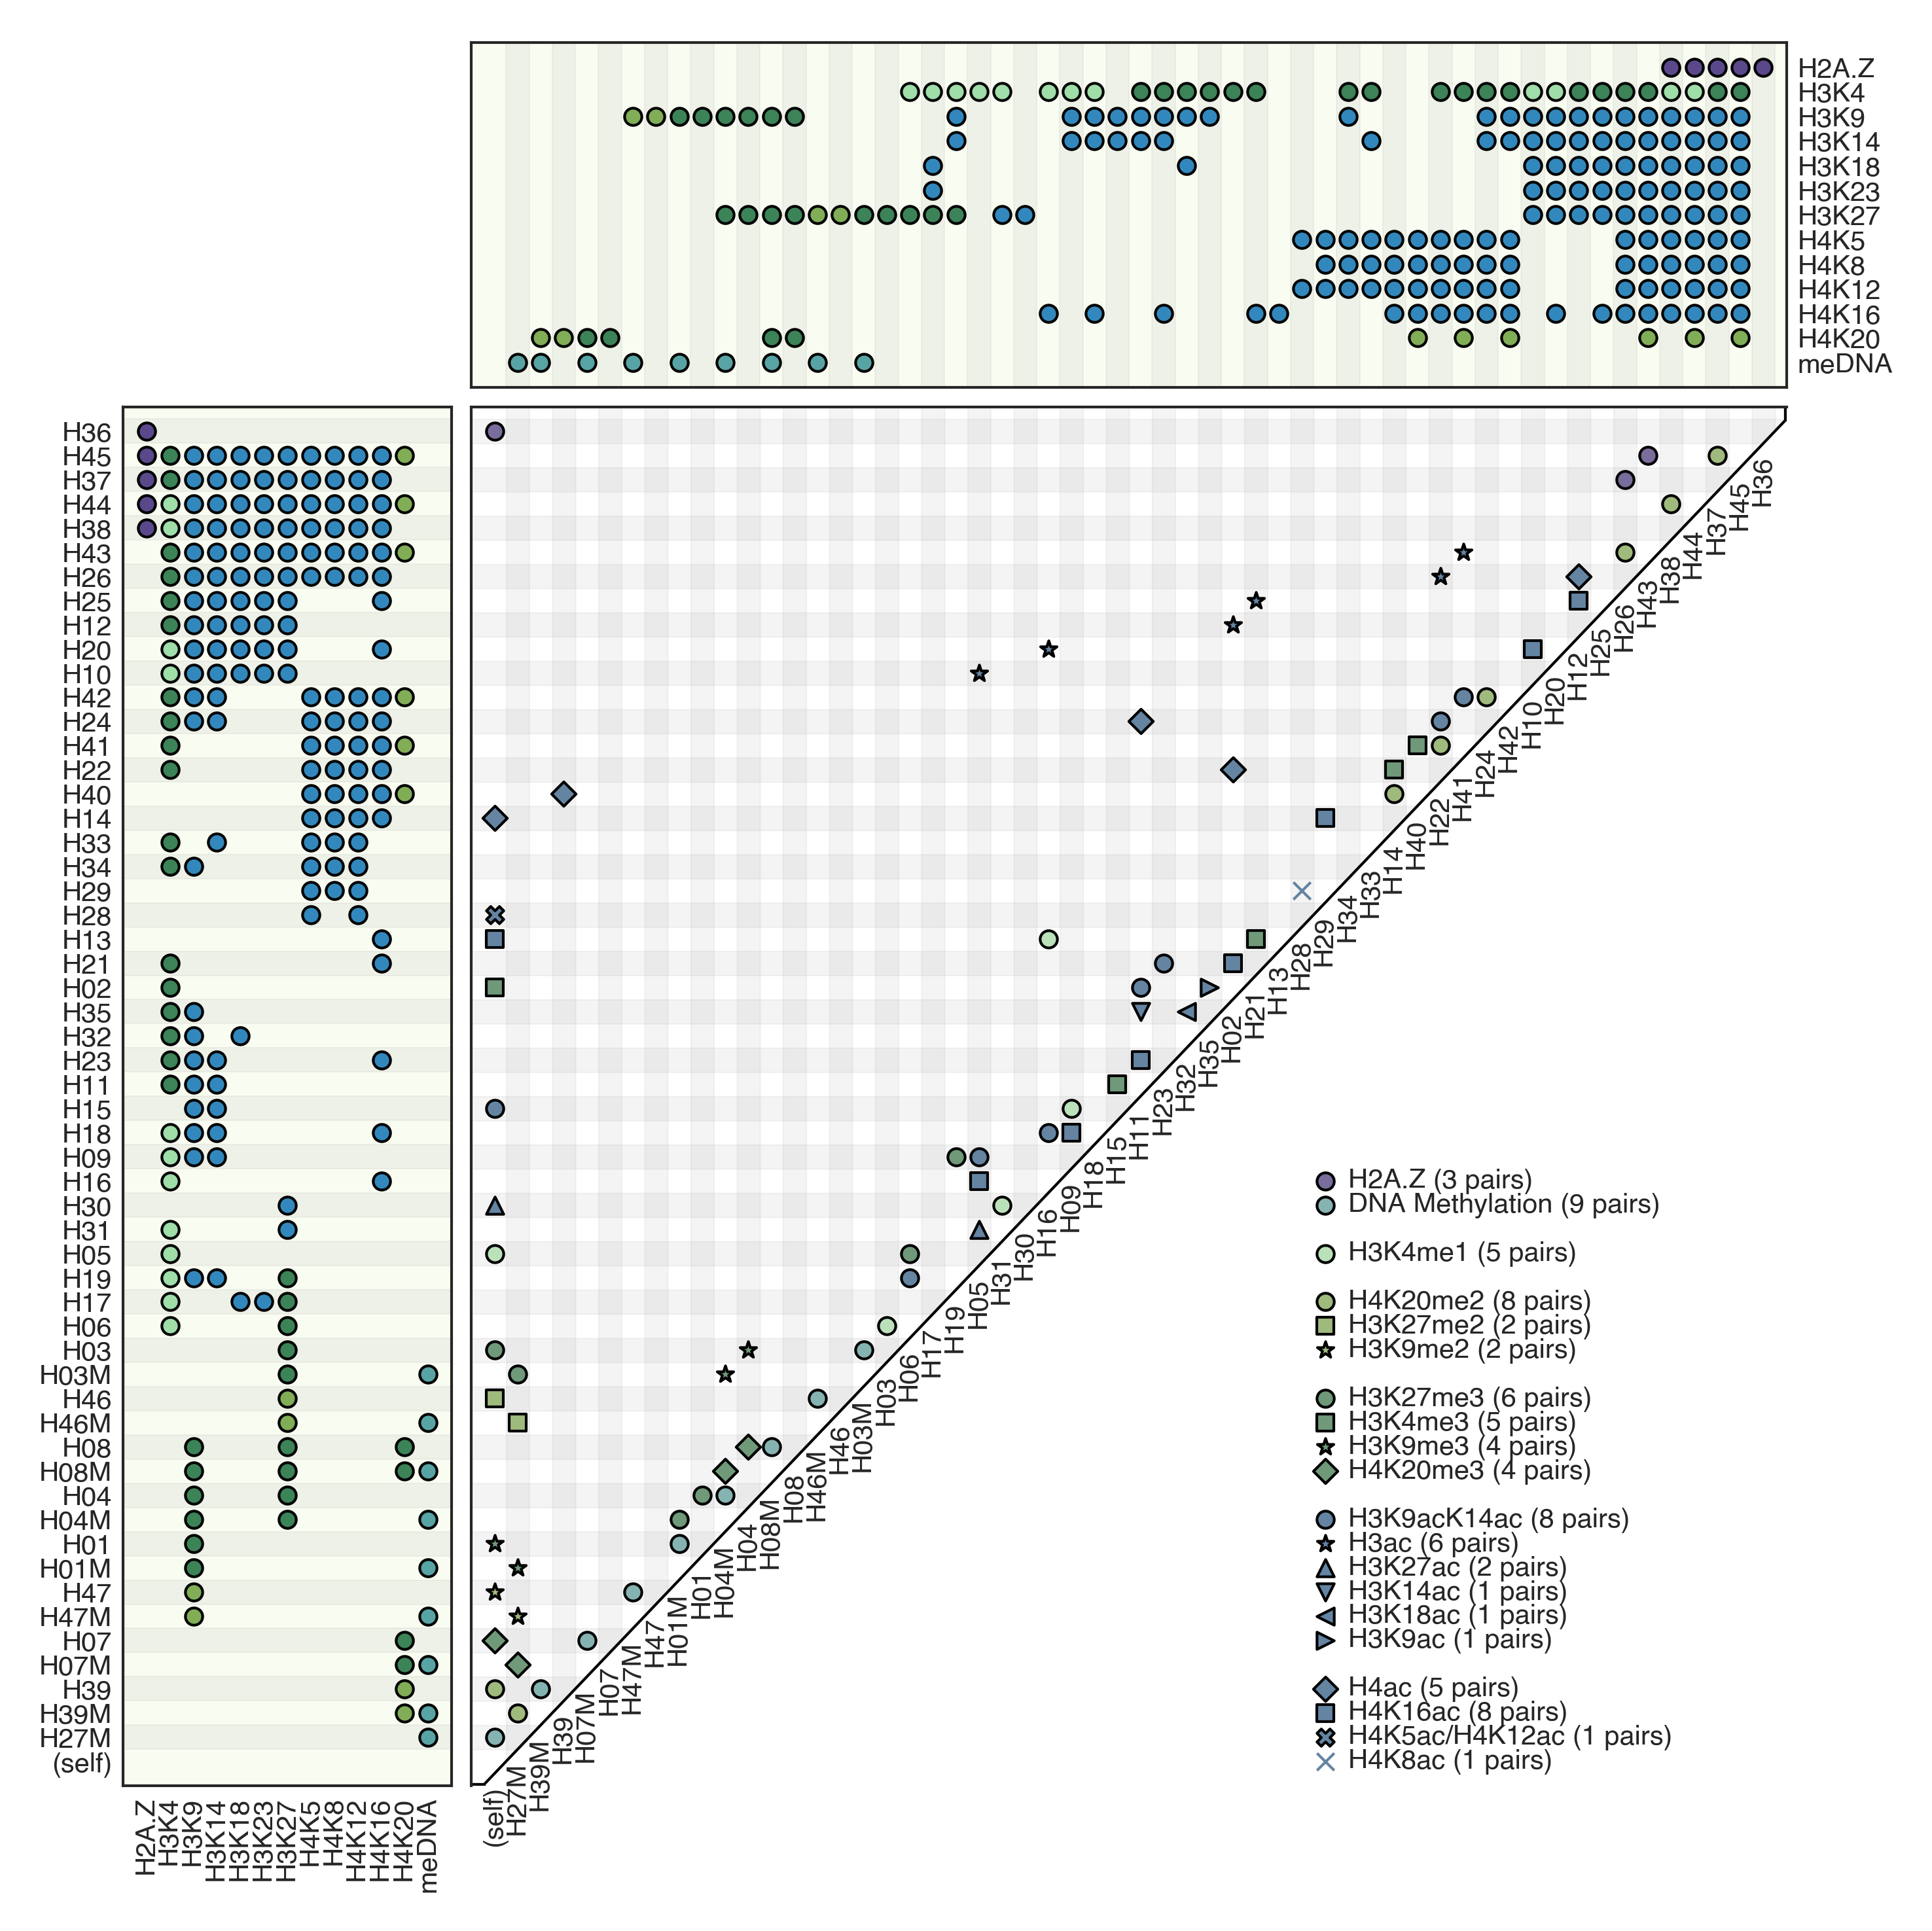

In [18]:
from matplotlib import gridspec
from seaborn.utils import relative_luminance


with sns.plotting_context({
    'axes.linewidth': 0.5,
    'grid.linewidth': 0.2,
    'grid.linestyle': '-',
}):

    fig = plt.figure(figsize=(4.72, 4.72), dpi=300, constrained_layout=True)
    gs = gridspec.GridSpec(2, 2, figure=fig,
                           height_ratios=[20, 80], width_ratios=[20, 80])




    labelsize=5
    annot_size=5
    header_scatter_size=10

    ax_heatmap = fig.add_subplot(gs[1:, 1:])
    ax_header_y = fig.add_subplot(gs[0, 1:], sharex=ax_heatmap)
    ax_header_x = fig.add_subplot(gs[1:, 0], sharey=ax_heatmap)
    
    
    span_fill_kwargs = dict(color='#969696', alpha=.1, zorder=0)
    max_pd_coord = max(pds_to_coordinates.values())
    
    padding = 1.0 # For xlim ylim
    xy_diagonal_offset = 0.5
    for pd_id, header_row in colored_predictors.iterrows():
        pd_coord = pds_to_coordinates[pd_id]
        
        if pd_coord % 2 == 1:
            ax_header_y.axvspan(pd_coord-0.5, pd_coord+0.5, **span_fill_kwargs)
            ax_header_x.axhspan(pd_coord-0.5, pd_coord+0.5, **span_fill_kwargs)
            
            # Half triangle vertical
            ax_heatmap.fill_between(
                [pd_coord-0.5, pd_coord, pd_coord+0.5], 
                [pd_coord-0.5-xy_diagonal_offset, pd_coord-xy_diagonal_offset, pd_coord+0.5-xy_diagonal_offset], 
                [max_pd_coord+padding, max_pd_coord+padding, max_pd_coord+padding], 
                **span_fill_kwargs
            )
            

            # Half triangle horizontal
            ax_heatmap.fill_between(
                [0-padding, pd_coord-0.5+xy_diagonal_offset, pd_coord+xy_diagonal_offset, pd_coord+0.5+xy_diagonal_offset],
                [pd_coord-0.5, pd_coord-0.5, pd_coord, pd_coord+0.5], 
                [pd_coord+0.5, pd_coord+0.5, pd_coord+0.5, pd_coord+0.5],
                **span_fill_kwargs
            )

        for ptm, color in header_row.items():
            ptm_coord = ptms_to_coordinates[ptm]

            if color != color_bcg:
                ax_header_y.scatter(pd_coord, ptm_coord, color=color, s=header_scatter_size, edgecolor='black', linewidth=0.5)
                ax_header_x.scatter(ptm_coord, pd_coord, color=color, s=header_scatter_size, edgecolor='black', linewidth=0.5)

    scatter_kws = dict(s=10, edgecolor='black', linewidth=0.5)
    for __, row in network_subdf.iterrows():

        pd_from = row['from_pd']
        pd_to = row['to_pd']

        pd_from_coord = pds_to_coordinates[pd_from]
        pd_to_coord = pds_to_coordinates[pd_to]

        predictor = row['predictor']
        color = predictors_df.loc[predictor, 'color']
        letter_encoding = predictors_df.loc[predictor, 'letter_encoding']

        lum = relative_luminance(color)
        text_color = "k" if lum > .408 else "w"
        
        # Do only half of matrix
        if pd_from_coord > pd_to_coord:
            pd_from_coord, pd_to_coord = pd_to_coord, pd_from_coord
        
        ax_heatmap.scatter(pd_from_coord, pd_to_coord, color=color, 
                           marker=predictors_df.loc[predictor, 'symbol_encoding'],
                           **scatter_kws)
#         ax_heatmap.scatter(pd_to_coord, pd_from_coord, color=color, **scatter_kws)

        font_kwargs = dict(color=text_color, fontsize=annot_size, 
                           ha='center', va='center')

#         if letter_encoding:        
#             ax_heatmap.text(pd_from_coord, pd_to_coord, letter_encoding, **font_kwargs)
#             ax_heatmap.text(pd_to_coord, pd_from_coord, letter_encoding, **font_kwargs)
    
    # Legend
    
    for p_i, predictor in enumerate(reversed(predictor_df_legend_order)):
        
        # Separators
        if predictor == '':
            continue
            
        
        row = predictors_df.loc[predictor]
        
        p_x_coord = max_pd_coord+padding-20
        p_y_coord = p_i
        
        ax_heatmap.scatter(
            p_x_coord,
            p_y_coord,
            color = row['color'],
            marker = row['symbol_encoding'],
            **scatter_kws,
        )

        ax_heatmap.text(
            p_x_coord+1,
            p_y_coord,
            '{} ({:,} pairs)'.format(predictor, row['count']),
            ha='left',
            va='center',
            fontsize=labelsize,
        )
#         pass
    
    # x=y diagonal

    ax_heatmap.plot([0-padding, max_pd_coord+padding], 
                    [0-padding-xy_diagonal_offset, max_pd_coord+padding-xy_diagonal_offset],
                    linestyle='-', color='k', linewidth=0.5)
    # Fills the gaps between spine and diagonal
    ax_heatmap.plot([0-padding, 
                     0-padding + xy_diagonal_offset], 
                    [0-padding, 0-padding],
                    # For some reason diagonal line looks twice as thick, so double linewidth here:
                    linestyle='-', color='k', linewidth=1.0
                   )
    ax_heatmap.plot(
         [max_pd_coord+padding, max_pd_coord+padding],            
         [max_pd_coord+padding-xy_diagonal_offset, max_pd_coord + padding],
         # For some reason diagonal line looks twice as thick, so double linewidth here:
         linestyle='-', color='k', linewidth=1.0
     )
    
#     for i in range(len(pd_order)):
#         ax_heatmap.scatter(i, i, color='black', **scatter_kws)


   
    tick_padding = 2
    ax_heatmap.set_xlim(-padding, len(pd_order) - 1 + padding)
    ax_heatmap.set_xticks(range(len(pd_order)))
    ax_heatmap.set_xticklabels(pd_order)
    ax_heatmap.set_yticklabels(pd_order)
    ax_heatmap.set_yticks(range(len(pd_order)))
    ax_heatmap.set_ylim(-padding, len(pd_order) - 1 + padding)
    ax_heatmap.xaxis.set_tick_params(length=0, rotation=90, labelsize=labelsize, pad=tick_padding)
    ax_heatmap.yaxis.set_tick_params(length=0, labelsize=labelsize, pad=tick_padding)
    
    # heatmap xlabels
    for pd_i, pd_name in enumerate(pd_order):
        ax_heatmap.text(pd_i, pd_i - 1, pd_name, 
                        rotation=90, fontsize=labelsize,
                        horizontalalignment='center',
                        verticalalignment='top')

    ax_header_y.yaxis.tick_right()


    ax_header_y.set_ylim(-padding, len(colored_predictors.columns) - 1 + padding)
    ax_header_x.set_xlim(-padding, len(colored_predictors.columns) - 1 + padding)



    ax_header_y.set_yticks(range(n_ptms))
    ax_header_y.set_yticklabels(ptm_order)
    ax_header_y.yaxis.set_tick_params(length=0, labelsize=labelsize, pad=tick_padding)
    ax_header_y.xaxis.set_tick_params(length=0, labelsize=labelsize, pad=tick_padding)

    ax_header_x.set_xticks(range(n_ptms))
    ax_header_x.set_xticklabels(ptm_order)
    ax_header_x.invert_xaxis()

    ax_header_x.xaxis.set_tick_params(rotation=90, length=0, labelsize=labelsize, pad=tick_padding)
    ax_header_x.yaxis.set_tick_params(length=0, labelsize=labelsize, pad=tick_padding)

    ax_header_x.set_facecolor(color_bcg)
    ax_header_y.set_facecolor(color_bcg)
    
    ax_header_x.grid(False)
    ax_header_y.grid(False)
    
    ax_heatmap.grid(False)


    for tick in ax_header_y.get_xmajorticklabels():
        tick.set_visible(False)

    for tick in ax_heatmap.get_ymajorticklabels():
        tick.set_visible(False)

    for ax in [ax_header_x, ax_header_y]:
        sns.despine(top=False, bottom=False, right=False, ax=ax)
        
    sns.despine(top=False, bottom=True, right=True, ax=ax_heatmap)
    
    # We're using manual labels
    for ticklabel in ax_heatmap.xaxis.get_ticklabels():
        ticklabel.set_visible(False)


    fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.0, hspace=0.015, wspace=0.015)

    plt.savefig(os.path.join(OUTPUT_DIRECTORY, 'network_df.pdf'), bbox_inches='tight')



In [19]:
predictors_df.sort_values(by=['color', 'letter_encoding'], ascending=True).index

Index(['H3K9acK14ac', 'H4K16ac', 'H3ac', 'H4ac', 'H3K27ac', 'H3K14ac',
       'H3K18ac', 'H3K9ac', 'H4K5ac/H4K12ac', 'H4K8ac', 'H3K27me3', 'H3K4me3',
       'H3K9me3', 'H4K20me3', 'H2A.Z', 'DNA Methylation', 'H4K20me2',
       'H3K27me2', 'H3K9me2', 'H3K4me1'],
      dtype='object', name='predictor')

In [20]:
from snapanalysis.models.enrichment.generate import OUTPUT_FILE as ENRICHMENT_FILE
from snapanalysis.models.enrichment.generate import MATRIX_COLUMN_FORWARD, MATRIX_COLUMN_REVERSE
MATRIX_COLUMN_FORWARD

COLUMN_X = MATRIX_COLUMN_FORWARD
COLUMN_Y = MATRIX_COLUMN_REVERSE

with pd.HDFStore(ENRICHMENT_FILE, 'r') as store:
    enrichment_data = store['enrichment_data']
    
enrichment_data['is_imputed'] = ~enrichment_data['Imputation type'].isnull()

In [21]:
enrichment_data['is_imputed'].value_counts()

False    70139
True     35461
Name: is_imputed, dtype: int64

In [22]:
def custom_order_predictor_edges(predictor):
    
    overrides = {
        'H3K4me3': [['H02'], ['H15', 'H11'], ['H13', 'H21'], ['H14', 'H22'], ['H40', 'H41']],
        'H3K4me1': [['H05'], ['H15', 'H09'], ['H13', 'H16'], ['H30', 'H31'], ['H03', 'H06']],
    }
    
    selected = predictor_edges(predictor)
    
    if predictor not in overrides:
        return selected
    else:
        # Check if we did not break anything
        set_selected = set(['-'.join(s) for s in selected])
        overriden = overrides[predictor]
        
        set_overriden = set(['-'.join(s) for s in overriden])
        
        assert set_selected == set_overriden
        
        return overriden
    

In [23]:
custom_order_predictor_edges('H3K4me1')

[['H05'], ['H15', 'H09'], ['H13', 'H16'], ['H30', 'H31'], ['H03', 'H06']]

In [24]:
from matplotlib import gridspec
from matplotlib import patheffects
from matplotlib import ticker

In [25]:
def plot_scatter_travels(enrichment_data, predictor, proteins_to_highlight, 
                         xlim=None, ylim=None, draw_arrows=True, annot_axes=True):
    
    data = enrichment_data.copy()
    data['group'] = 'other'

    for prot in proteins_to_highlight:
        data.loc[prot, 'group'] = prot

    marker_imputed = '.'
    marker_standard = 'o'
    marker_size_imputed = 6
    marker_size_standard = 35
    color_other = '#d5d5d5'
    alpha_other = .5
    edgewidth = 1.0

    width = height = 1.2

    edges = custom_order_predictor_edges(predictor)
    n_edges = len(edges)

    fig = plt.figure(figsize=(width*2, n_edges * height), 
                     constrained_layout=True)

    gs = gridspec.GridSpec(ncols=2, nrows=n_edges, figure=fig)

    ax_left = None
    ax_right = None

    for plot_row, edge in enumerate(edges):

        if len(edge) == 1:
            ax_left = None
            ax_right = fig.add_subplot(gs[plot_row, 1], 
                                sharex=ax_right, 
                                sharey=ax_right)
            subdata_row = data.loc(axis=0)[:, edge]
            pd_left = None
            pd_right = edge[0]

        else:
            ax_left = fig.add_subplot(gs[plot_row, 0], 
                                sharex=ax_right, 
                                sharey=ax_right)
            ax_right = fig.add_subplot(gs[plot_row, 1], 
                                sharex=ax_right, 
                                sharey=ax_right)

            subdata_row = data.loc(axis=0)[:, edge]
            pd_left, pd_right = edge

        # First plot "others"
        subdata_others = subdata_row[subdata_row['group'] == 'other']
        for (pd, is_imputed), sdf in subdata_others.reset_index().groupby(('Pull-Down ID', 'is_imputed')):
            ax = ax_left if pd == pd_left else ax_right
            ax.scatter(sdf[COLUMN_X], 
                       sdf[COLUMN_Y],
                       s=marker_size_imputed,
                       alpha=alpha_other,
                       color=color_other,
                       marker=marker_imputed if is_imputed else marker_standard,
                       rasterized=True)

        # Now let's go through the remaining proteins
        for protein, color in proteins_to_highlight.items():

            df_protein = subdata_row.loc[protein]


            if pd_left is not None:
                row_left = df_protein.loc[pd_left]
            else:
                row_left = None

            row_right = df_protein.loc[pd_right]

            for ax, row in [(ax_left, row_left), (ax_right, row_right)]:
                if row is not None:
                    ax.scatter(row[COLUMN_X], 
                                row[COLUMN_Y],
                                s=marker_size_standard,
                                alpha=1.0,
                                facecolor=color,
                                edgecolor='black',
                                linewidth=edgewidth / 2,
                                marker=marker_imputed if row['is_imputed'] else marker_standard,
                                rasterized=True)


            if row_left is not None:
                prev_x, prev_y, prev_imputed = row_left[COLUMN_X], row_left[COLUMN_Y], row_left['is_imputed']
            else:
                prev_x = prev_y = 0
                prev_imputed = False


            ax_right.scatter(prev_x, 
                             prev_y,
                             s=marker_size_standard,
                             alpha=1.0,
                             facecolor='none',
                             edgecolor=color,
                             linewidth=edgewidth,
                             marker=marker_imputed if prev_imputed else marker_standard,
                             rasterized=True)


            dx = row_right[COLUMN_X] - prev_x
            dy = row_right[COLUMN_Y] - prev_y

            
            if draw_arrows:
                ax_right.annotate('',
                                  xytext=(prev_x, prev_y),
                                  xy=(row_right[COLUMN_X], row_right[COLUMN_Y]),
                                  arrowprops=dict(color=color, 
                                                  shrinkA=0.5,
                                                  shrinkB=0.5,
                                                  linewidth=2,
                                                  path_effects=[patheffects.Stroke(linewidth=2.5, foreground='black'),
                                                                patheffects.Normal()],
        #                                           connectionstyle='arc3',
                                                  arrowstyle='-|>'))

            
            if annot_axes:
                if ax_left is not None:
                    ax_left.text(0.97, 0.97, pd_left, fontweight='bold', 
                              transform=ax_left.transAxes, ha='right', va='top')

                ax_right.text(0.97, 0.97, pd_right, fontweight='bold', 
                              transform=ax_right.transAxes, ha='right', va='top')
            
        for ax in [ax_left, ax_right]:
            if ax is None:
                continue
            for spine in ax.spines.values():
                spine.set_visible(True)

            ax.axvline(0, color='black', zorder=0)
            ax.axhline(0, color='black', zorder=0)

            if xlim is not None:
                ax.set_xlim(*xlim)
            if ylim is not None:
                ax.set_ylim(*ylim)

            ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
            ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
            ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
            ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
            ax.set_aspect('equal')                   
    
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.01, wspace=0.05, hspace=0.05)

    return fig

def edge_tostring(edge):
    if len(edge) == 1:
        return '{}-(self)'.format(edge[0])
    else:
        return '-'.join([edge[1], edge[0]])
    
def plot_protein_response_bars(ptm, 
                               proteins_to_highlight,
                               width=1.7,
                               height=1.0,
                               ylims=None):
    
    lm = load_limma_long_matrix(ptm)
    limma_result = load_limma_data(ptm)

    protein_order = list(proteins_to_highlight.keys())

    edges = custom_order_predictor_edges(ptm)
    edges = list(map(edge_tostring, edges))

    n_proteins = len(protein_order)

    fig = plt.figure(figsize=(width, n_proteins * height), 
                     constrained_layout=True)

    gs = gridspec.GridSpec(ncols=1, nrows=n_proteins, figure=fig)
    
    if not isinstance(ylims, list):
        ylims = [ylims] * n_proteins
        
    ax = None

    for plot_row, (protein, ylim) in enumerate(zip(protein_order, ylims)):
        color = proteins_to_highlight[protein]

        ax = fig.add_subplot(gs[plot_row, 0])

        subdf = lm.loc[protein, edges, True, :].reset_index()

        sns.barplot(x='edge', y='normed_ratio', 
                    order=edges, 
                    color=color, 
                    ax=ax,
                    data=subdf.reset_index())

    #     ax.axhline(0, linestyle='-', color='k ', linewidth=2, zorder=3)
        
        if ylim is None:
            ylim = list(ax.get_ylim())

            ylim[0] = np.sign(ylim[0]) * np.ceil(np.abs(ylim[0]) * 2) / 2 
            ylim[1] = np.sign(ylim[1]) * np.ceil(np.abs(ylim[1]) * 2) / 2 

        absmax = np.max(np.abs(ylim))

        ax.set_ylim(ylim)

        if absmax < 1:  
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        else:
            ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
            ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5)) 

        sns.despine(ax=ax, bottom=True, offset=5)
        ax.set_xlabel('')
        ax.set_ylabel('Change in\nH/L ratio')
        ax.set_title(protein)
        ax.xaxis.set_tick_params(length=0, rotation=90)

        ax.axhline(limma_result.loc[protein, 'logFC'], color='black')


        if plot_row != n_proteins - 1:
            for tick in ax.get_xticklabels():
                ax.xaxis.set_tick_params(length=0)
                tick.set_visible(False)

    return fig
    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:55: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.


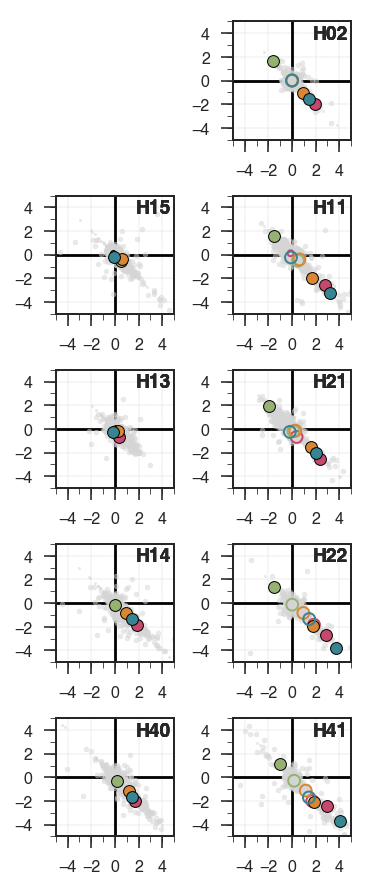

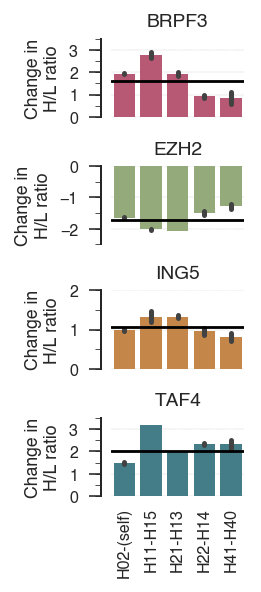

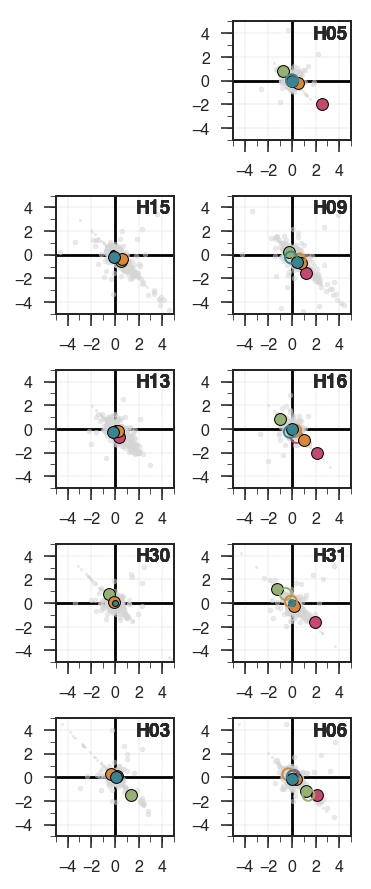

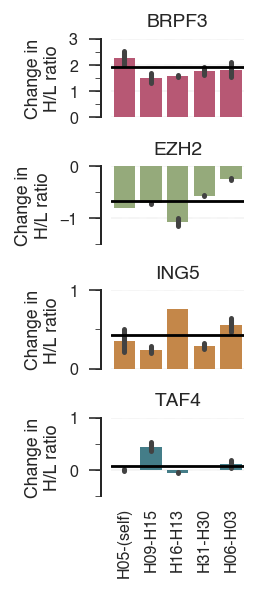

In [28]:

proteins_to_highlight = {
    'BRPF3': '#C7486D',
    'EZH2': '#96B273',
    'ING5': '#D98734',
    'TAF4': '#398493',
}



for predictor in ['H3K4me3', 'H3K4me1']:
    
    with sns.plotting_context({
        'axes.linewidth': 1.0,
        'grid.linewidth': 0.2,
        'grid.linestyle': ':',
    }):
        plot_scatter_travels(enrichment_data, predictor, 
                             proteins_to_highlight, 
                             xlim=(-5.0, 5.0), ylim=(-5.0, 5.0), 
                             annot_axes=True,
                             draw_arrows=False)

        plt.savefig(os.path.join(OUTPUT_DIRECTORY, f'{predictor}-ratio-travels.pdf'), bbox_inches='tight', dpi=300)

        plot_protein_response_bars(predictor, proteins_to_highlight)
        plt.savefig(os.path.join(OUTPUT_DIRECTORY, f'{predictor}-protein_response_bars.pdf'), bbox_inches='tight', dpi=300)